In [ ]:
import pandas as pd
import numpy as np
import random
import pickle
import time
import matplotlib.pyplot as plt

# Function

In [ ]:
def extractPair(tour):
  tourPairs = []
  for i in range(len(tour)-1):
    tourPairs.append([tour[i],tour[i+1]])
  return tourPairs

def calculateLength(tour, distance):
  d = 0
  for i in range(len(tour)-1):
    d = d + distance[tour[i]][tour[i+1]]
  return d

In [ ]:
def extractWeed(results):
  results_length = []
  results_tour = []
  for weeds in results:
    tmpLength = []
    tmpTour = []
    for weed in weeds:
      tmpLength.append(weed.length)
      tmpTour.append(weed.tour)
    results_length.append(tmpLength)
    results_tour.append(tmpTour)
  return results_length, results_tour

In [ ]:
class InvasiveWeed:

  def __init__(self, cityNumber=None, distanceMatrix=None, isSeed=False):
    if (isSeed):
      self.tour = []
      self.length = 0
    else:
      self.tour = list(range(cityNumber))
      random.shuffle(self.tour)
      self.length =  calculateLength(self.tour, distanceMatrix)

  def setSeed(self, tour, length):
    self.tour = tour
    self.length = length

  def generateSeed(self, M, distanceMatrix):
    SS = np.random.randint(len(self.tour), size=[2,M])
    case = np.random.randint(4, size=M)+1
    newSeedTour = self.tour.copy()
    for i in range(M):
      MPF(newSeedTour, case[i], SS[0][i], SS[1][i])
    newSeedLength = calculateLength(newSeedTour, distanceMatrix)
    newSeed = InvasiveWeed(None, None, True)
    newSeed.setSeed(newSeedTour, newSeedLength)
    return newSeed

  def __str__(self):
    return f'Length: {self.length}, Tour: {self.tour[:10]} ... {self.tour[-10:]}'

  def __repr__(self):
    return f'Length: {self.length}, Tour: {self.tour[:10]} ... {self.tour[-10:]}'

  def __lt__(self, other):
    return self.length < other.length

In [ ]:
def get_distance(dataset):
  distance_arr = []
  for i in range(len(dataset)):
    distance = []
    for j in range(len(dataset)):
      a = np.array([dataset['x'][i], dataset['y'][i]])
      b = np.array([dataset['x'][j], dataset['y'][j]])
      distance.append(np.linalg.norm(a-b))
    distance_arr.append(distance)
  return np.array(distance_arr)

# Evaluate

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/time_A200.pickle', 'rb') as f:
    results, times = pickle.load(f)

In [ ]:
times

[587.1552641391754,
 989.3680005073547,
 435.4515130519867,
 1064.058912038803,
 757.8052036762238,
 2467.3869848251343,
 718.9983172416687,
 1782.8388776779175]

In [ ]:
res_l, res_t = extractWeed(results)

In [ ]:
full_l = [tourLengths[-1] for tourLengths in res_l]
half_l = [tourLengths[59999] for tourLengths in res_l]
quarter_l =  [tourLengths[29999] for tourLengths in res_l]

In [ ]:
df_200 = pd.DataFrame({
    'smax':([3]*4)+([5]*4),
    'MEnd':((([1]*2)+([3]*2))*2),
    'pmax':[20,60]*4,
    'length(quarter)': quarter_l,
    'length(half)': half_l,
    'length(full)': full_l,
    'time': times
    })

In [ ]:
df_200

,smax,MEnd,pmax,length(quarter),length(half),length(full),time
0,3,1,20,115152.710499,52785.775584,38820.636338,587.155264
1,3,1,60,109961.152590,49830.984925,42061.655198,989.368001
2,3,3,20,124304.909052,90334.250645,49019.485414,435.451513
3,3,3,60,120037.107023,81886.834342,44890.983649,1064.058912
4,5,1,20,102435.852618,48400.499215,38572.019598,757.805204
5,5,1,60,102374.184122,46524.066378,40765.642437,2467.386985
6,5,3,20,123480.001991,86818.810615,47268.507672,718.998317
7,5,3,60,108673.739204,74005.000334,41768.453701,1782.838878


Text(0, 0.5, 'Distance')

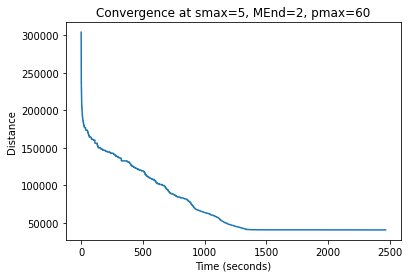

In [ ]:
plt.plot([i*times[5]/120000 for i in range(120000)], res_l[5])
plt.title("Convergence at smax=5, MEnd=2, pmax=60")
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')

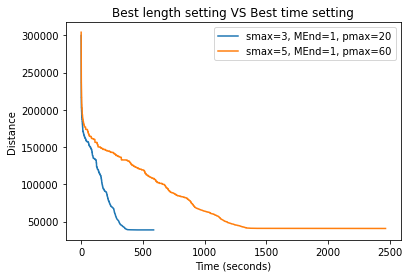

In [ ]:
plt.plot([i*times[0]/120000 for i in range(120000)], res_l[0], label='smax=3, MEnd=1, pmax=20')
plt.plot([i*times[5]/120000 for i in range(120000)], res_l[5], label='smax=5, MEnd=1, pmax=60')
plt.title("Best length setting VS Best time setting")
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Test smax

In [ ]:
df_200.groupby('smax').mean()[['length(full)', 'time']]

,length(full),time
smax,,
3,43698.190150,769.008422
5,42093.655852,1431.757346


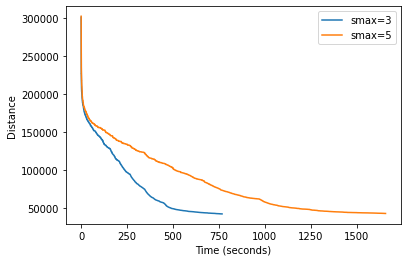

In [ ]:
arr_l = np.array(res_l)
mean_smax3 = np.mean(arr_l[:5], axis=0)
mean_smax3_time = np.mean(times[:5])
mean_smax5 = np.mean(arr_l[5:], axis=0)
mean_smax5_time = np.mean(times[5:])
plt.plot([i*mean_smax3_time/120000 for i in range(120000)], mean_smax3, label='smax=3')
plt.plot([i*mean_smax5_time/120000 for i in range(120000)], mean_smax5, label='smax=5')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Test MEnd

In [ ]:
df_200.groupby('MEnd').mean()[['length(full)', 'time']]

,length(full),time
MEnd,,
1,40054.988393,1200.428863
3,45736.857609,1000.336905


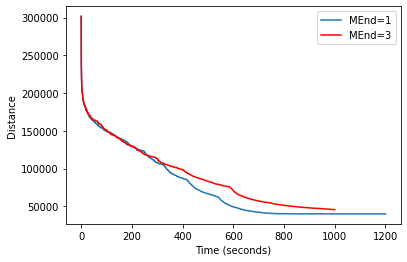

In [ ]:
mean_mend1 = np.mean(np.array(res_l[0:2] + res_l[4:6]), axis=0)
mean_mend1_time = np.mean(times[0:2] + times[4:6])
mean_mend3 = np.mean(np.array(res_l[2:4] + res_l[6:]), axis=0)
mean_mend3_time = np.mean(times[2:4] + times[6:])
plt.plot([i*mean_mend1_time/120000 for i in range(120000)], mean_mend1, label='MEnd=1')
plt.plot([i*mean_mend3_time/120000 for i in range(120000)], mean_mend3, label='MEnd=3', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Test pmax

In [ ]:
df_200.groupby('pmax').mean()[['length(full)', 'time']]

,length(full),time
pmax,,
20,43420.162255,624.852575
60,42371.683746,1575.913194


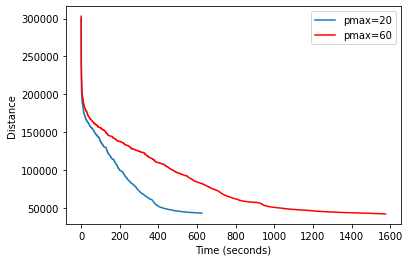

In [ ]:
mean_pmax20 = np.mean(np.array([res_l[0],res_l[2],res_l[4],res_l[6]]), axis=0)
mean_pmax20_time = np.mean([times[0],times[2],times[4],times[6]])
mean_pmax60 =  np.mean(np.array([res_l[1],res_l[3],res_l[5],res_l[7]]), axis=0)
mean_pmax60_time = np.mean([times[1],times[3],times[5],times[7]])
plt.plot([i*mean_pmax20_time/120000 for i in range(120000)], mean_pmax20, label='pmax=20')
plt.plot([i*mean_pmax60_time/120000 for i in range(120000)], mean_pmax60, label='pmax=60', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Test MEnd

In [ ]:
df_200.groupby('MEnd').mean()[['length(full)', 'time']]

,length(full),time
MEnd,,
1,40054.988393,1200.428863
3,45736.857609,1000.336905


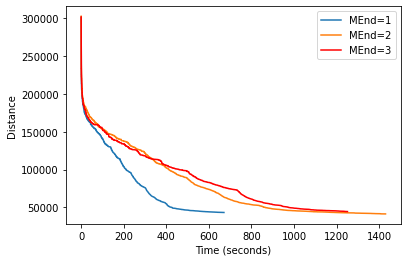

In [ ]:
mean_mend1 = np.mean(np.array(res_l[0:3] + res_l[9:12]), axis=0)
mean_mend1_time = np.mean(times[0:3] + times[9:12])
mean_mend2 = np.mean(np.array(res_l[3:6] + res_l[12:15]), axis=0)
mean_mend2_time = np.mean(times[3:6] + times[12:15])
mean_mend3 = np.mean(np.array(res_l[6:9] + res_l[15:]), axis=0)
mean_mend3_time = np.mean(times[6:9] + times[15:])
plt.plot([i*mean_mend1_time/120000 for i in range(120000)], mean_mend1, label='MEnd=1')
plt.plot([i*mean_mend2_time/120000 for i in range(120000)], mean_mend2, label='MEnd=2')
plt.plot([i*mean_mend3_time/120000 for i in range(120000)], mean_mend3, label='MEnd=3', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Test pmax

In [ ]:
df_200.groupby('pmax').mean()[['length(full)', 'time']]

,length(full),time
pmax,,
20,43420.162255,624.852575
60,42371.683746,1575.913194


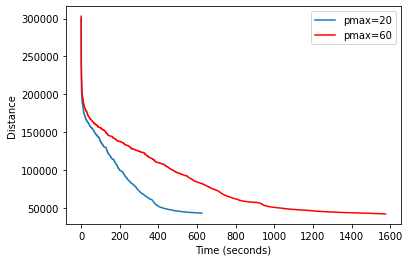

In [ ]:
mean_pmax20 = np.mean(np.array([res_l[0],res_l[2],res_l[4],res_l[6]]), axis=0)
mean_pmax20_time = np.mean([times[0],times[2],times[4],times[6]])
mean_pmax60 =  np.mean(np.array([res_l[1],res_l[3],res_l[5],res_l[7]]), axis=0)
mean_pmax60_time = np.mean([times[1],times[3],times[5],times[7]])
plt.plot([i*mean_pmax20_time/120000 for i in range(120000)], mean_pmax20, label='pmax=20')
plt.plot([i*mean_pmax60_time/120000 for i in range(120000)], mean_pmax60, label='pmax=60', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

## Compare with ACO

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/time_A200_ACO.pickle', 'rb') as f:
    results_aco, times_aco = pickle.load(f)

In [ ]:
df_A100 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroA200.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})
dis_a100 = get_distance(df_A100)

In [ ]:
res_l_aco = []
res_t_aco = []
for tests in results_aco:
  tmpLength = []
  tmpTour = []
  for round in tests:
    tmpLength.append(calculateLength(round, dis_a100))
  res_l_aco.append(tmpLength)
  res_t_aco.append(tmpTour)

In [ ]:
full_l_aco = [tourLengths[-1] for tourLengths in res_l_aco]
half_l_aco  = [tourLengths[249] for tourLengths in res_l_aco]
quarter_l_aco  =  [tourLengths[124] for tourLengths in res_l_aco]

In [ ]:
df_100_ACO = pd.DataFrame({
    'p': [0.05,0.1,0.15],
    'length(quarter)': quarter_l_aco,
    'length(half)': half_l_aco,
    'length(full)': full_l_aco,
    'time': times_aco
    })

In [ ]:
df_100_ACO

,p,length(quarter),length(half),length(full),time
0,0.05,47683.571072,45666.493767,45666.493767,5429.178251
1,0.10,51671.181363,41786.060156,41786.060156,5486.186243
2,0.15,48986.704778,49524.355837,49524.355837,5490.248982


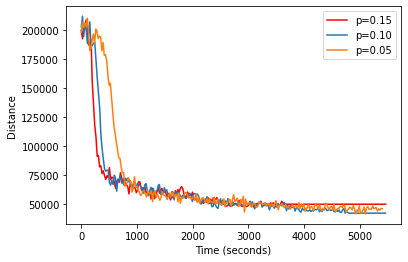

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i*times_aco[2]/250 for i in range(250)], res_l_aco[2], label='p=0.15', color='red')
plt.plot([i*times_aco[1]/250 for i in range(250)], res_l_aco[1], label='p=0.10')
plt.plot([i*times_aco[0]/250 for i in range(250)], res_l_aco[0], label='p=0.05')
# plt.title("ACO convergence for each p (KroA200)")
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

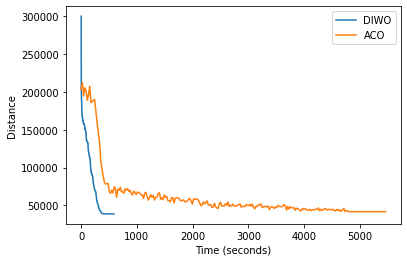

In [ ]:
plt.plot([i*times[0]/120000 for i in range(120000)], res_l[0], label='DIWO')
plt.plot([i*times_aco[1]/250 for i in range(250)], res_l_aco[1][:250], label='ACO')
# plt.title("Convergence comparing between DIWO (best length) and ACO")
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

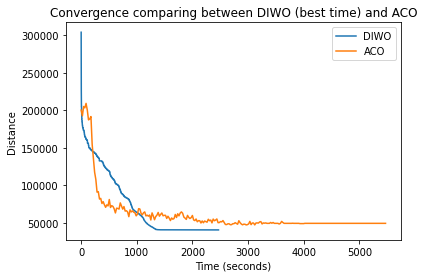

In [ ]:
plt.plot([i*times[5]/120000 for i in range(120000)], res_l[5], label='DIWO')
plt.plot([i*times_aco[2]/250 for i in range(250)], res_l_aco[2][:250], label='ACO')
# plt.title("Convergence comparing between DIWO (best time) and ACO")
plt.xlabel('Time (seconds)')
plt.ylabel('Distance')
plt.legend()

In [ ]:
res_l_aco[1].index(min(res_l_aco[1]))

230

In [ ]:
bestTour_A200 = results_aco[1][230]
calculateLength(bestTour_A200, dis_a200)

41786.06015626359

PLOT MAP

In [ ]:
import matplotlib.pyplot as plt

def plotTSP(path, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list

    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.figure(figsize=(20,10))
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()

In [ ]:
df_A200 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KroA200.csv", header=None).rename(columns={0: 'number', 1: 'x', 2: 'y'})
dis_a200 = get_distance(df_A200)

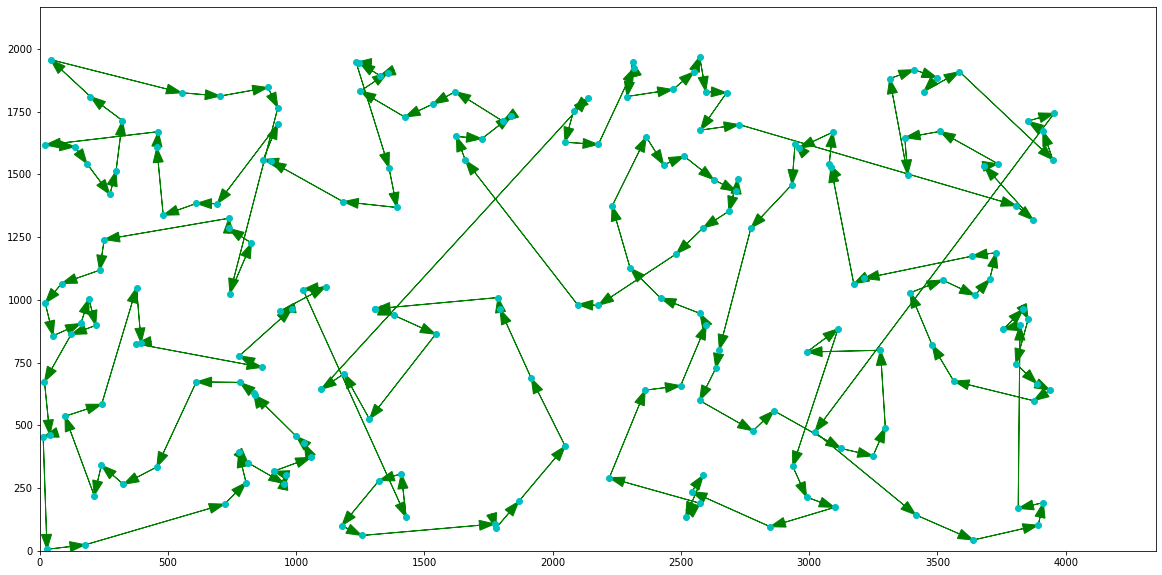

<Figure size 1440x720 with 0 Axes>

In [ ]:
    # Create a randomn list of coordinates, pack them into a list
    x_cor = list(df_A200['x'])
    y_cor = list(df_A200['y'])
    points = []
    for i in range(0, len(x_cor)):
        points.append((x_cor[i], y_cor[i]))

    # Create two paths, teh second with two values swapped to simulate a 2-OPT
    # Local Search operation
    path1 = bestTour_A200

    # Pack the paths into a list
    paths = [path1]

    # Run the function
    plotTSP(paths, points, 1)

In [ ]:
best_path= [180, 142, 69, 108, 14, 192, 60, 101, 4, 163, 93, 106, 149, 190, 49, 18, 110, 29, 184, 37, 179, 153, 66, 119, 19, 99, 92, 10, 175, 36, 57, 74, 100, 156, 33, 45, 197, 81, 97, 104, 165, 166, 96, 126, 87, 52, 11, 84, 48, 170, 122, 116, 188, 44, 63, 194, 51, 16, 118, 124, 138, 9, 78, 82, 7, 199, 26, 61, 136, 32, 24, 159, 174, 121, 172, 46, 12, 147, 40, 132, 111, 117, 115, 53, 1, 85, 145, 191, 27, 198, 123, 15, 13, 79, 160, 162, 64, 20, 55, 42, 135, 186, 127, 112, 120, 47, 31, 67, 177, 65, 80, 77, 158, 193, 128, 167, 30, 68, 169, 35, 2, 181, 125, 161, 151, 187, 157, 107, 109, 6, 54, 75, 183, 155, 8, 22, 134, 129, 146, 103, 143, 17, 25, 90, 34, 58, 141, 171, 200, 98, 114, 88, 148, 28, 39, 38, 71, 130, 72, 83, 62, 185, 168, 50, 139, 86, 196, 56, 152, 178, 5, 105, 43, 137, 133, 176, 113, 195, 182, 94, 95, 91, 150, 173, 23, 144, 70, 76, 102, 164, 140, 21, 154, 89, 41, 59, 3, 73, 189, 131, 180]
best_path = list(np.array(best_path)-1)
calculateLength(best_path, dis_a200)

29369.407046748292

In [ ]:
bestTour_A200 = [33, 89, 142, 24, 16, 111, 119, 66, 176, 12, 197, 190, 0, 52, 114, 116, 110, 39, 146, 191, 13, 107, 157, 76, 79, 150, 186, 5, 108, 106, 156, 46, 30, 162, 105, 148, 43, 187, 62, 15, 117, 123, 60, 135, 120, 173, 158, 23, 31, 25, 198, 6, 81, 77, 8, 137, 36, 183, 28, 109, 17, 48, 92, 3, 100, 59, 192, 127, 166, 163, 139, 88, 58, 68, 99, 32, 44, 196, 96, 80, 155, 179, 130, 188, 40, 29, 67, 168, 167, 184, 61, 82, 53, 64, 26, 11, 65, 152, 47, 165, 95, 86, 125, 164, 103, 118, 189, 171, 45, 131, 84, 144, 122, 14, 78, 159, 161, 54, 185, 154, 182, 7, 145, 102, 113, 97, 87, 38, 129, 71, 49, 138, 85, 94, 93, 181, 194, 112, 175, 132, 136, 42, 104, 4, 195, 177, 151, 55, 70, 37, 27, 147, 199, 170, 140, 57, 128, 133, 21, 74, 126, 41, 134, 19, 63, 160, 124, 180, 1, 34, 22, 172, 149, 90, 143, 69, 75, 101, 20, 153, 72, 2, 141, 73, 56, 35, 174, 9, 91, 98, 18, 178, 50, 193, 115, 121, 169, 83, 10, 51,33]